# **Price prediction on California's coast** #

Elaborate a model that enables prediciton of median housing prices per block in california.

---

## **Frame the problem** ##
Outputs will be fet to another ML algorithm evaluating if investing in a California's area is worth. It is really important to get accurate prices.
A full dataset of california median prices per block is given. It includes median price per block + many other metrics.

---

### **Buisness objective** ###
Build a ML algorithm to determine areas that are worth investing in. This restricts to California.

---

### **Use case** ###
Outputs will be fet to another ML algorithm evaluating if investing in a California's area is worth.

---

### **Current solutions?** ###
Manual evaluation by a team of experts. If price data does not exists, it is estimated using complex rules. Current precision us +- 30%

---

### **Problem framing** ###
- Clear supervised problem
- Batch learning
- Multiple, univariate Regression problem

---

### **How to measure performance?** ###
Norm : L2 or L1. Depends on outliers
$$RMSE(X,h) = \sqrt{\frac{1}{m_i}\sum_{i=1}^m(h(X_i)-y_i)^2}$$
$$MAE(X,h) = \frac{1}{m_i}\sum_{i=1}^m|h(X_i)-y_i|$$

---

### **Is performance measure aligned with buisness objective?** ###
Yes as it will allow to know whether we fall under the 30% average error mark.

---

### **Minimum performance for production** ###
Fall under the 30% error mark 

---

### **Comparable or existing solutions** ###

None, for exercice purpose

---

### **Human expertise available?** ###

The experts already working to evaluate housing prices.

---

### **How to solve problem manually** ###

Ask the experts

---

### **List assumptions** ###

Currently, we assume the downstream algorithm will use the prices as a continuous value. If for instance it was a category (*low price, medium price, high price*), the precision is less important. Only the category.
==> The problem becomes a **classification task**

---

### **Evaluate assumptions** ###

For exercice purpose, we assume the task is indeed a regression.

---


## **Get the data** ##

### **What data and how much?** ###
We need the california district housing prices from the SatLib dataset

---

### **Where to get the data?** ###
The data is stored at the address : *https://github.com/ageron/data/raw/main/housing.tgz*

---

### **How much space will the data take** ###
~ 500Kbs

---

### **Legal obligations** ###

N/A

---

### **get authorizations** ###

N/A

---

### **Create a workspace and get the data and convert it without alterations** ###

In [3]:
from pathlib import Path
import tarfile
import urllib.request
import pandas as pd

def fetchHousingData(reload = False):
    DataURL      = "https://github.com/ageron/data/raw/main/housing.tgz"
    RawDataDir   = "RawData"
    TarballPath  = Path(RawDataDir) / "housing.tgz"
    CSVPath      = Path(RawDataDir) / "housing/housing.csv"

    Path(RawDataDir).mkdir(exist_ok=True)
    if reload or not TarballPath.is_file():
        urllib.request.urlretrieve(DataURL, TarballPath)
    
        with tarfile.open(TarballPath) as HousingTarball:
            HousingTarball.extractall(RawDataDir)

    return pd.read_csv(CSVPath)

Housing = fetchHousingData()
Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### **Anonimize / protect the data** ###

N/A

---

### **Check size & type** ###

In [4]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
Housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
Housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


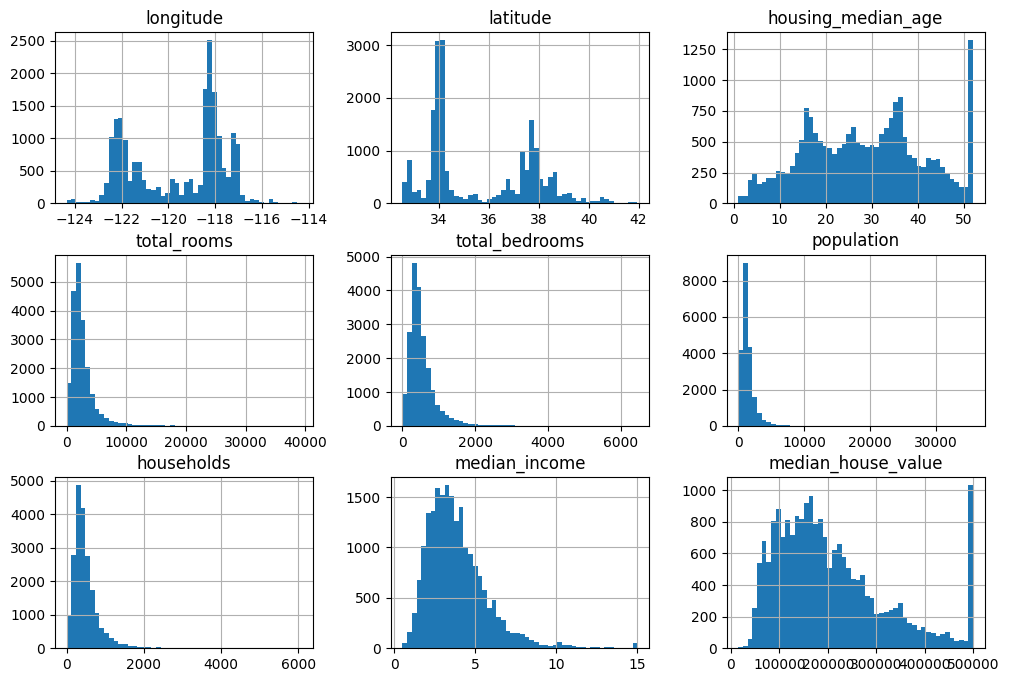

In [7]:
import matplotlib.pyplot as plt
Housing.hist(bins=50, figsize=(12,8))
plt.show()


***Firsts observations***
1. Ocean_Proximity is a category (Island could be an outlier)
    - <1H OCEAN      9136
    - INLAND         6551
    - NEAR OCEAN     2658
    - NEAR BAY       2290
    - ISLAND           5
    
2. Some rows (207) are missing dataon the number of rooms per block.
3. There are population concentrations on longitude E -122 && E -118 as well as on Latitude N 34 && N 38
4. Housing median age & value seems to be capped to 50 years & $500k which causes outliers.
5. Median income is not in \$. It has been normalized and capped at 15 for high incomes and 0.5 for low incomes. *Note: The value is approximatively in tens of thousands of dollars. ( 3 ~= $30 000)*
6. Total rooms, bedrooms, population, households & median income needs normalization.
7. Scales of attributes are very different

### Sample a test set and never look at it ###
**ATTENTION:**
   - You can't simply shuffle the data because this means the dataset would change at each call
   - You cant either fix a specific seed for the shuffling step as updated datasets would break the test set
   - You should use a hash on an identifier
        - The identifier can be a specific, unique identifier
        - It can also be the Index (if reset)
        - The hash can be anything. the crc32 is OK.
        - **If database updates drop rows or change indexes, try to used the most stable features to compose an index, here, for instance latitude and longitude could work. However the sampling is coarse, leading to same indexes being computed, leading to sampling bias**

In [8]:
import zlib
import numpy as np

def filterIndexOnhash(index, ratio):
    return zlib.crc32(np.int64(index)) < 2**32 * ratio

def splitTestSetOnIndex(TestSet, IndexColumn, ratio):
    InTestSet = TestSet[IndexColumn].apply(lambda index : filterIndexOnhash(index, ratio))
    return TestSet[~InTestSet], TestSet[InTestSet]

HousingWithId = Housing.reset_index()

""" Could be used to generate an id based on latitude & longitude"""
# HousingWithId = Housing.copy()
# HousingWithId["index"] = np.int64(Housing["latitude"] * 1000) +  np.int64(Housing["longitude"] * 2000)
""" End of example"""

RandomDevSet, RandomValidationSet = splitTestSetOnIndex(HousingWithId, IndexColumn="index", ratio=0.2)

## **Explore the data** ##

### **Create a copy** ###

N/A

---

### **Create a notebook to record exploration** ###

N/A

---

### **Study each attribute** ###

- Name
- Type 
- Missing values (%)
- Noisiness
- Usefulness
- Distribution

--- 

#### **Median income attribute** ####
- Assuming the experts say the median income is crucial for making an accurate prediction, we need to perform stratified sampling based on the median income.
   1. Create categories
   3. Implement stratified sampling method for "fun"
   2. Use scikit-learn to get a stratified sampling

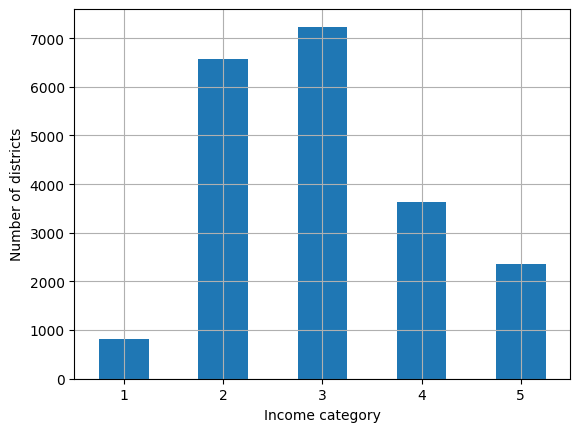

In [9]:
Housing
Housing["incomeCategory"] = pd.cut(Housing["median_income"],
                                    bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                    labels=[1, 2, 3, 4, 5])

Housing["incomeCategory"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

We then need to perform a stratified split using scikit-learn

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
stratifiedSplits = []
for train_index, test_index in splitter.split(Housing, Housing["incomeCategory"]):
    stratifiedSplits.append((Housing.iloc[train_index], Housing.iloc[test_index]))

For now, we will use only the first split

In [11]:
StratifiedTrainSet, StratifiedTestSet = stratifiedSplits[0]

Another Possibility, split once

In [12]:
from sklearn.model_selection import train_test_split
StratifiedDevSet, StratifiedValidationSet = train_test_split(Housing, test_size=0.2, stratify=Housing["incomeCategory"], random_state=42)

Print the percentages of each category in the train set

In [13]:
StratifiedTrainSet["incomeCategory"].value_counts() / len(StratifiedTrainSet)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: incomeCategory, dtype: float64

Compute statistical errors between stratified and non stratified sets

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd

def computeCatProportions(data):
    return data["incomeCategory"].value_counts() / len(data)

StratifiedSet, _ = train_test_split(Housing, test_size=0.2, stratify=Housing["incomeCategory"], random_state=42)
RandomSet, _ = train_test_split(Housing, test_size=0.2, random_state=42)

statistics = pd.DataFrame({"Overall %" : computeCatProportions(Housing),
                           "Stratified %" : computeCatProportions(StratifiedSet),
                           "Random %" : computeCatProportions(RandomSet)}).sort_index()
statistics["StratError %"] = (statistics["Stratified %"] - statistics["Overall %"]) / statistics["Overall %"]
statistics["RandomError %"] = (statistics["Random %"] - statistics["Overall %"]) / statistics["Overall %"]

statistics * 100

,Overall %,Stratified %,Random %,StratError %,RandomError %
1,3.982558,3.978924,3.918362,-0.091241,-1.611922
2,31.884690,31.885901,32.170543,0.003799,0.896520
3,35.058140,35.059351,35.192587,0.003455,0.383499
4,17.630814,17.629603,17.435804,-0.006870,-1.106073
5,11.443798,11.446221,11.282703,0.021169,-1.407705


Drop the income category

In [15]:
for set in (StratifiedDevSet, StratifiedValidationSet):
    set.drop("incomeCategory", axis=1, inplace=True)

### **Visualise the data** ###
1. copy the data

In [16]:
ExplorationData = StratifiedDevSet.copy()

**Plot the data**

Density:

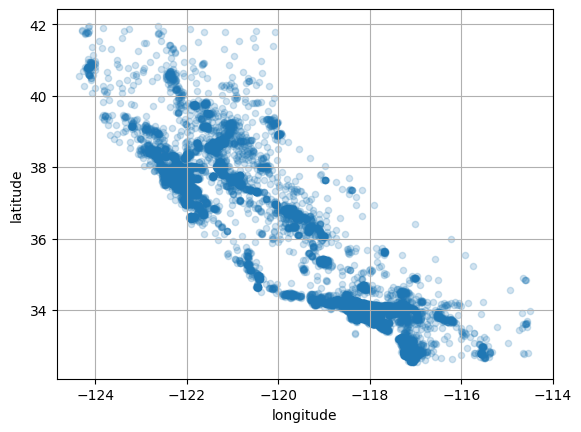

In [17]:
import matplotlib.pyplot as plt

ExplorationData.plot(x="longitude", y="latitude", kind="scatter", grid=True, alpha=0.2)
plt.show()

Prices + density

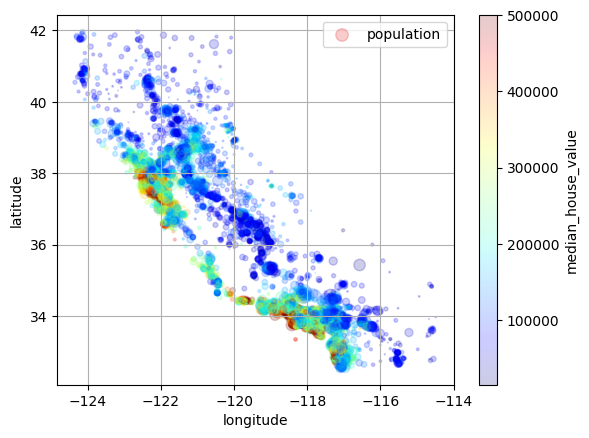

In [18]:
ExplorationData.plot(x="longitude", y="latitude", s=ExplorationData["population"]/100, label="population", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, kind="scatter", grid=True, alpha=0.2)
plt.show()

Explore correlations

In [19]:
CorrelationMatrix = ExplorationData.corr(numeric_only=True)
CorrelationMatrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Plot a scatter Matrix

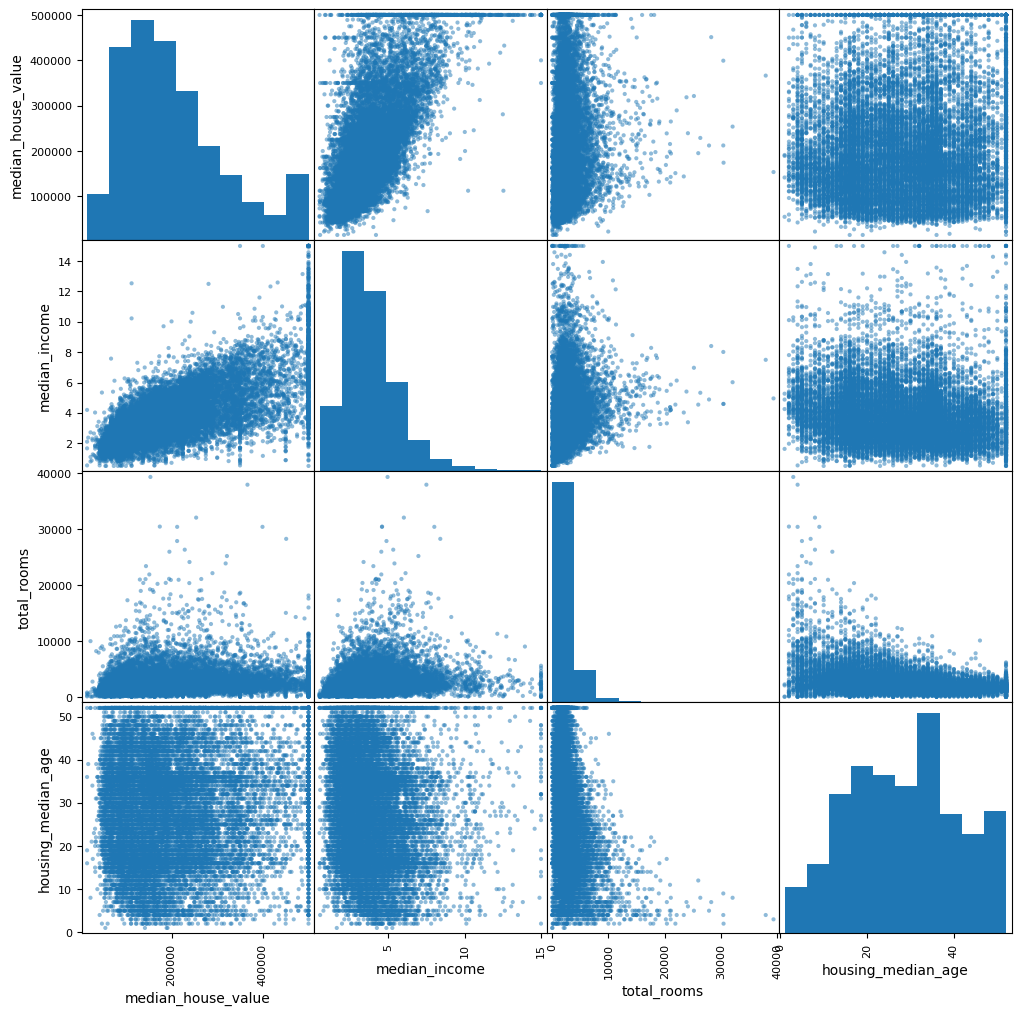

In [20]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(ExplorationData[attributes], figsize = (12, 12))
plt.show()

Median income seems interesting

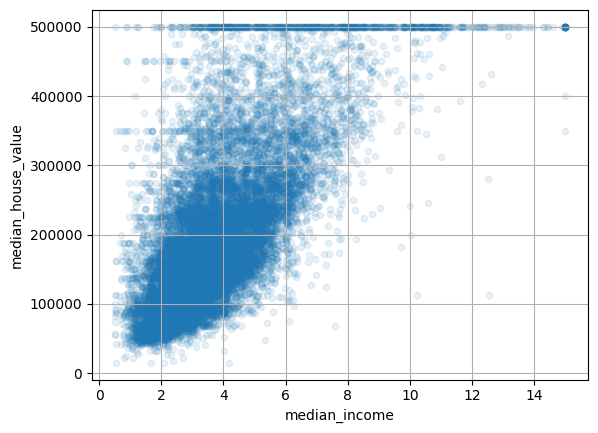

In [21]:
ExplorationData.plot(x="median_income", y="median_house_value", kind="scatter", alpha=0.1, grid=True)
plt.show()

Create composite attributes

In [22]:
ExplorationData["RoomsPerHousehold"] = ExplorationData["total_rooms"] / ExplorationData["households"]
ExplorationData["BedroomsRoomsRatio"] = ExplorationData["total_bedrooms"] / ExplorationData["total_rooms"]
ExplorationData["PeoplePerHouse"] = ExplorationData["population"] / ExplorationData["households"]

corr_matrix = ExplorationData.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
RoomsPerHousehold     0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
PeoplePerHouse       -0.038224
longitude            -0.050859
latitude             -0.139584
BedroomsRoomsRatio   -0.256397
Name: median_house_value, dtype: float64

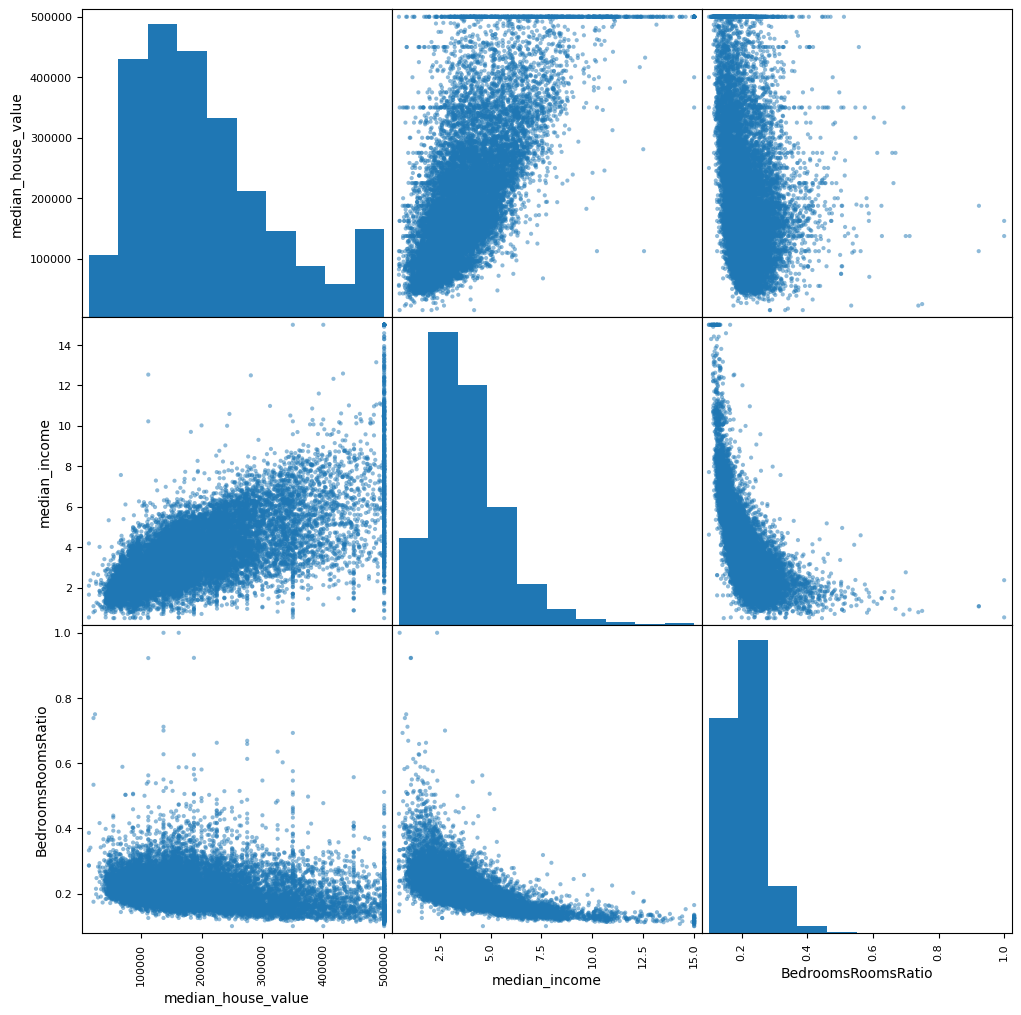

In [23]:
attributes = ["median_house_value", "median_income", "BedroomsRoomsRatio"]
pd.plotting.scatter_matrix(ExplorationData[attributes], figsize = (12, 12))
plt.show()

Prepare the data for learning

In [24]:
from sklearn.impute import SimpleImputer
TrainingData = StratifiedDevSet.drop("median_house_value", axis=1)
TrainingLabels = StratifiedDevSet["median_house_value"]

inputer = SimpleImputer(strategy="median")

DataNum = TrainingData.select_dtypes(include=[np.number])
inputer.fit(DataNum)

FilledTrainingData=pd.DataFrame(inputer.transform(DataNum), columns=DataNum.columns, index = DataNum.index)
FilledTrainingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


Transform the data
Build transformation functions

In [25]:
from sklearn.preprocessing import FunctionTransformer
LogTransformer = FunctionTransformer(np.log, inverse_func=np.exp)


RBF kernel (gaussian kernel)

In [26]:
from sklearn.preprocessing import OneHotEncoder

Encoder = OneHotEncoder()
Categories = Encoder.fit_transform(TrainingData[["ocean_proximity"]])

FilledTrainingDataWithCat = pd.concat((FilledTrainingData, 
                            pd.DataFrame(Categories.toarray(), columns=Encoder.get_feature_names_out(), index=FilledTrainingData.index)), 
                            axis="columns")
FilledTrainingDataWithCat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   ocean_proximity_<1H OCEAN   16512 non-null  float64
 9   ocean_proximity_INLAND      16512 non-null  float64
 10  ocean_proximity_ISLAND      16512 non-null  float64
 11  ocean_proximity_NEAR BAY    16512 non-null  float64
 12  ocean_proximity_NEAR OCEAN  16512 non-null  float64
dtypes: float64(13)
memory usage

Implement custom estimator for cluster detection

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import estimator_checks

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma = 1.0, random_state=None) -> None:
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None):
        self.KMeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.KMeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.KMeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


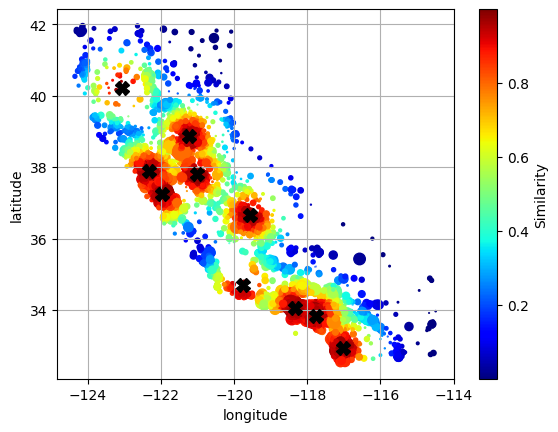

In [28]:
clusterSimil = ClusterSimilarity(random_state=42)
similarities = clusterSimil.fit_transform(FilledTrainingDataWithCat[["latitude", "longitude"]], sample_weight=TrainingLabels)

PlotData = FilledTrainingDataWithCat.copy()

PlotData["Similarity"] = similarities.max(axis=1)

PlotData.plot(kind="scatter", x="longitude", y="latitude", grid = True, s=PlotData["population"] / 100, c = "Similarity", cmap="jet", colorbar=True)
plt.plot(clusterSimil.KMeans_.cluster_centers_[:,1], 
         clusterSimil.KMeans_.cluster_centers_[:,0],
         linestyle="", color="black", marker="X", markersize=10)
plt.show()


Pipelines

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Used to enable pipeline diagram view
import sklearn
sklearn.set_config(display="diagram")

numPipeline = Pipeline([
                        ("impute", SimpleImputer(strategy="median")),
                        ("standardize", StandardScaler())
                        ])

catPipeline = Pipeline([
                        ("Impute", SimpleImputer(strategy="most_frequent")),
                        ("Encode", OneHotEncoder(handle_unknown="ignore"))
                        ])

numAttribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
catAttribs = ["ocean_proximity"]

preprocessing = ColumnTransformer([
                                    ("num", numPipeline, numAttribs),
                                    ("cat", catPipeline, catAttribs)
                                    ])

StratifiedDevSet
housing_prepared = pd.DataFrame(preprocessing.fit_transform(StratifiedDevSet) ,columns = preprocessing.get_feature_names_out())

housing_prepared

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


Now, create the full pipeline : 
- replace missing numerical attributes with median, category with most frequent
- Onehot encode categories
- Compute ratios
    - bedrooms ratios
    - rooms_per_house
    - people_per_house
- Compute cluster similarity
- Compule log of long tail features
- Standardise all nums

c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


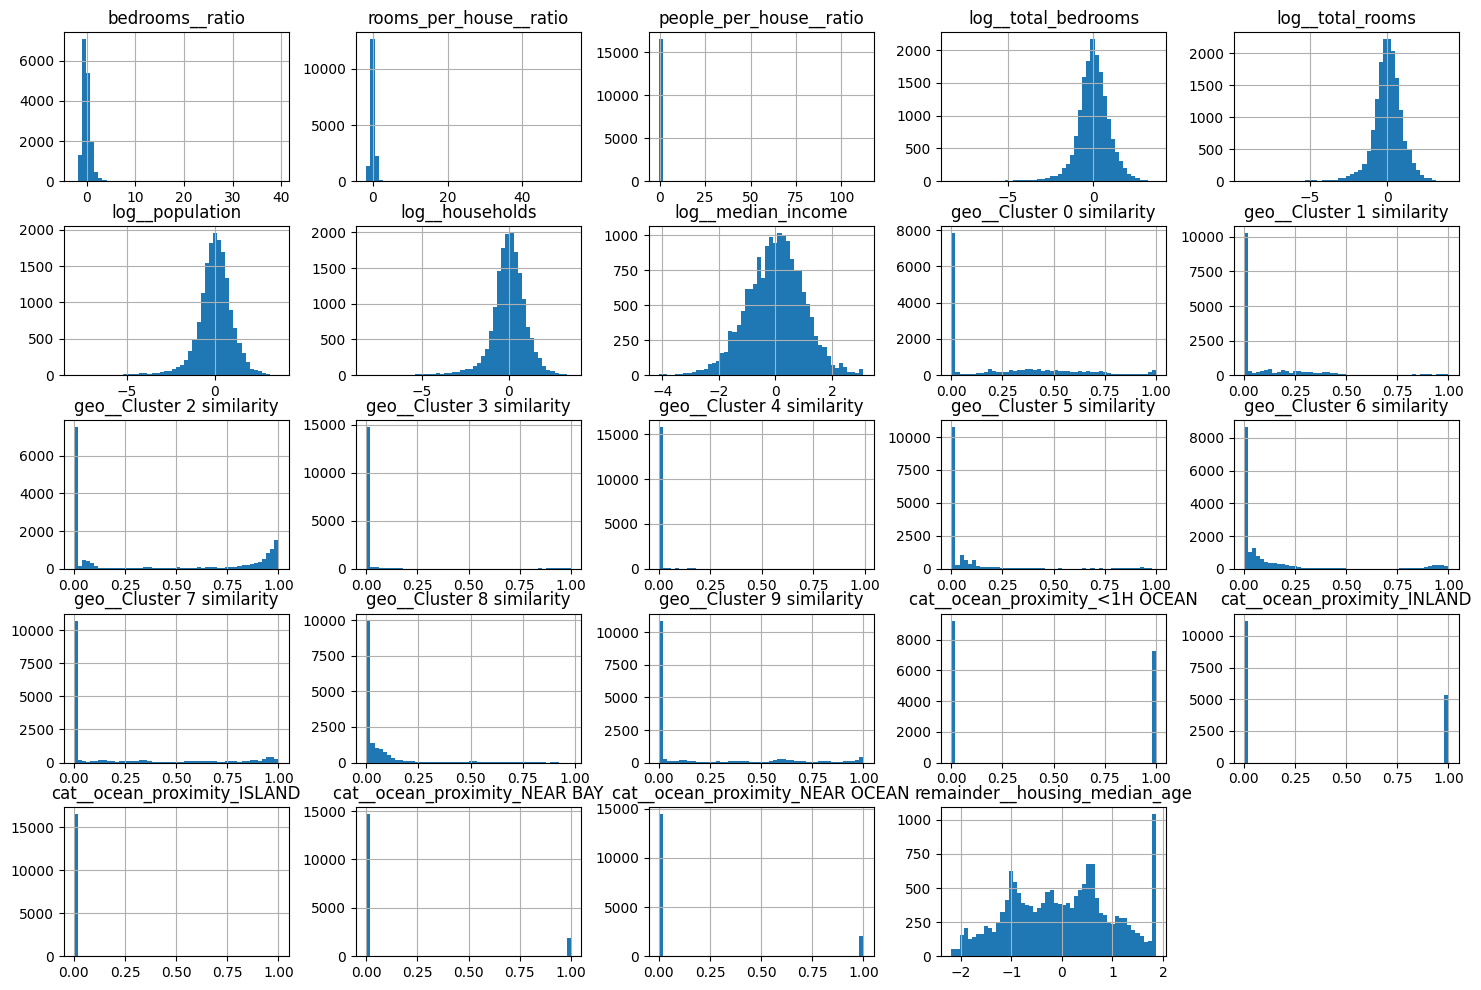

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

def columnRatio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"),
                         FunctionTransformer(columnRatio, feature_names_out=ratio_name),
                         StandardScaler())
    
log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                            FunctionTransformer(np.log, feature_names_out="one-to-one"),
                            StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)

preprocessing = ColumnTransformer([("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
                                   ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
                                   ("people_per_house", ratio_pipeline(), ["population", "households"]),
                                   ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
                                   ("geo", cluster_simil, ["latitude", "longitude"]),
                                   ("cat", cat_pipeline, ["ocean_proximity"])],
                                  remainder=default_num_pipeline)

Labels = StratifiedDevSet["median_house_value"]
TrainingSet = StratifiedDevSet.drop("median_house_value", axis=1)

ProcessedTrainingSet = pd.DataFrame(preprocessing.fit_transform(TrainingSet), columns=preprocessing.get_feature_names_out())

ProcessedTrainingSet.hist(bins=50, figsize=(18,12))
plt.show()

Now, start by training a very simple linear model

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(TrainingSet, Labels)

predictions = lin_reg.predict(TrainingSet)

print(predictions[:5].round(-2))
print(Labels.iloc[:5].values)

[243700. 372400. 128800.  94400. 328300.]
[458300. 483800. 101700.  96100. 361800.]


c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(Labels, predictions, squared=False)
lin_rmse

68687.89176590016

La précision est mauvaise. On tente un arbre de décision

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(TrainingSet, Labels)

TreePredictions = tree_reg.predict(TrainingData)
tree_rmse = mean_squared_error(Labels, TreePredictions, squared=False)
tree_rmse

c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.0

In [39]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, TrainingData, Labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg=make_pipeline(preprocessing,
                         RandomForestRegressor(random_state=42))

forest_reg.fit(TrainingSet, Labels)

ForestPredictions = forest_reg.predict(TrainingData)
forest_rmse = mean_squared_error(Labels, ForestPredictions, squared=False)
forest_rmse

c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


17474.619286483998

In [41]:
forest_rmses= -cross_val_score(forest_reg, TrainingData, Labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(forest_rmses).describe()

c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

Grid search for the hyperparameters

In [42]:
from sklearn.model_selection import GridSearchCV

fullPipeline = Pipeline([("preprocessing", preprocessing),
                         ("random_forest", RandomForestRegressor(random_state=42))])

ParamGrid = [{"preprocessing__geo__n_clusters" : [5, 8, 10],
              "random_forest__max_features" : [4, 6, 8]},
             {"preprocessing__geo__n_clusters" : [10, 15],
              "random_forest__max_features" : [4, 6, 8]}]

grid_search = GridSearchCV(fullPipeline, ParamGrid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(TrainingData, Labels)
grid_search.best_params_

c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [43]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
13,6.871534,0.245878,0.135321,0.007378,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43459.598047,-43918.632694,-44747.781772,-44042.004171,533.085183,1
12,5.273149,0.129133,0.173192,0.028757,15,4,"{'preprocessing__geo__n_clusters': 15, 'random...",-43493.633900,-43905.498462,-44946.489778,-44115.207380,611.381454,2
14,8.822230,0.169040,0.194091,0.086896,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44132.027207,-44075.251239,-45009.672809,-44405.650418,427.736807,3
7,6.740633,0.122064,0.134842,0.002671,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4
10,6.624289,0.069209,0.132852,0.003344,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4


Random search for the hyperparameters

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"preprocessing__geo__n_clusters" : randint(low=3, high=50),
                  "random_forest__max_features" : randint(low=2, high=20)}

rand_search =RandomizedSearchCV(fullPipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring = "neg_root_mean_squared_error", random_state=42)
rand_search.fit(TrainingData, Labels)
rand_search.best_params_


c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [48]:
cv_res = pd.DataFrame(rand_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,9.528466,0.078096,0.137789,0.001612,45,9,"{'preprocessing__geo__n_clusters': 45, 'random...",-41286.610782,-42070.533721,-42627.483756,-41994.876086,550.017055,1
8,8.514862,0.060858,0.157087,0.008170,32,7,"{'preprocessing__geo__n_clusters': 32, 'random...",-41689.984035,-42512.726146,-43223.547238,-42475.419140,626.630079,2
0,16.988334,1.371455,0.136435,0.001795,41,16,"{'preprocessing__geo__n_clusters': 41, 'random...",-42223.254183,-42959.048891,-43320.889998,-42834.397690,456.694309,3
5,5.257941,0.443073,0.146832,0.015724,42,4,"{'preprocessing__geo__n_clusters': 42, 'random...",-41817.935999,-43094.489045,-43816.506749,-42909.643931,826.315940,4
2,8.619148,0.096098,0.132398,0.000847,23,8,"{'preprocessing__geo__n_clusters': 23, 'random...",-42263.593330,-42995.980237,-43830.097592,-43029.890386,639.972043,5


### If supervised : what attribute? ###

### Explore correlations ###

### How to solve manually ###

### Study promising transformations to apply before ###

### Extra data required? ###

### Document what has been learned ###

## Prepare the data ##

### Clean the data ###

#### Remove outliers? ####
#### Fill missing values or drop columns / rows ####

### Select useful features (drop some?) ###

### Feature engineering? ###
#### Discretize continuous ####
#### Decompose ####
#### Add promising transformations ####
#### Aggregate features into new ones ####

### Scale features ###
#### Standardize or normalize ####


## Shortlist models ##

### Try and train many quick and dirty models (linear, Bayes, SVM, neural nets, random forests, etc...) ###

### Measure performance (use N-folds cross validation) ###

### Analize significant variables for each model ###

### Analyze errors models make and what data would a human need to avoid these? ###

### Quick round of feature selection / engineering ###

### Quickly iterate the previous steps (one or two times) ###

### Select a few models (3 to 5) preferring models that make different types of errors ###

## Fine tune ##

### Fine tune hyperparameters using cross-validation ###
- Treat data transforms as hyperparameters especially if not sure about them
- Unless very few hyperparameters, prefer random search over grid search. If training is long, use optimizations

### Try running models together (often gives better results) ###

### Once confindent, validate the model against the test set ###

### Measure performance (use N-folds cross validation) ###

### Analize significant variables for each model ###

### Analyze errors models make and what data would a human need to avoid these? ###

### Quick round of feature selection / engineering ###

### Quickly iterate the previous steps (one or two times) ###

### Select a few models (3 to 5) preferring models that make different types of errors ###